## scale_ 불량 예측_ NN(분류)

In [16]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# 경고 메세지 처리
import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지 무시/숨김
# warnings.filterwarnings(action='default') # 경고 메시지 활성화|

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


## (1)데이터 구성하기

In [18]:
df_train_x = pd.read_csv("./data/scale_train_x.xls", usecols=lambda column: column != "Unnamed: 0")
df_train_y = pd.read_csv("./data/scale_train_y.xls", usecols=lambda column: column != "Unnamed: 0")
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   pt_width                   695 non-null    int64
 1   fur_soak_time              695 non-null    int64
 2   rolling_temp               695 non-null    int64
 3   day                        695 non-null    int64
 4   hour                       695 non-null    int64
 5   minute                     695 non-null    int64
 6   weekday_number             695 non-null    int64
 7   pt_length_cluster          695 non-null    int64
 8   steel_kind_T               695 non-null    int64
 9   rolling_method_TMCP(온도제어)  695 non-null    int64
 10  work_group_2조              695 non-null    int64
 11  work_group_3조              695 non-null    int64
 12  work_group_4조              695 non-null    int64
 13  is_high_strength_True      695 non-null    int64
 14  is_ship_steel_True        

In [19]:
df_test_x = pd.read_csv("./data/scale_test_x.xls", usecols=lambda column: column != "Unnamed: 0")
df_test_y = pd.read_csv("./data/scale_test_y.xls", usecols=lambda column: column != "Unnamed: 0")
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   pt_width                   299 non-null    int64
 1   fur_soak_time              299 non-null    int64
 2   rolling_temp               299 non-null    int64
 3   day                        299 non-null    int64
 4   hour                       299 non-null    int64
 5   minute                     299 non-null    int64
 6   weekday_number             299 non-null    int64
 7   pt_length_cluster          299 non-null    int64
 8   steel_kind_T               299 non-null    int64
 9   rolling_method_TMCP(온도제어)  299 non-null    int64
 10  work_group_2조              299 non-null    int64
 11  work_group_3조              299 non-null    int64
 12  work_group_4조              299 non-null    int64
 13  is_high_strength_True      299 non-null    int64
 14  is_ship_steel_True        

### rolling_temp drop

In [20]:
df_train_x = df_train_x.drop('rolling_temp', axis = 1)
df_test_x = df_test_x.drop('rolling_temp', axis = 1)

In [21]:
# Data 구조 확인
print("train data 구조:", df_train_x.shape)
print()
print("변수 : ", df_train_x.columns)

train data 구조: (695, 20)

변수 :  Index(['pt_width', 'fur_soak_time', 'day', 'hour', 'minute', 'weekday_number',
       'pt_length_cluster', 'steel_kind_T', 'rolling_method_TMCP(온도제어)',
       'work_group_2조', 'work_group_3조', 'work_group_4조',
       'is_high_strength_True', 'is_ship_steel_True', 'heat_temp_high_True',
       'soak_temp_high_True', 'both_temp_high_True', 'descaling_parity_odd',
       'rolling_temp_1000_low', 'hsb_적용'],
      dtype='object')


In [22]:
# Data 구조 확인
print("test data 구조:", df_test_x.shape)
print()
print("변수 : ", df_train_x.columns)

test data 구조: (299, 20)

변수 :  Index(['pt_width', 'fur_soak_time', 'day', 'hour', 'minute', 'weekday_number',
       'pt_length_cluster', 'steel_kind_T', 'rolling_method_TMCP(온도제어)',
       'work_group_2조', 'work_group_3조', 'work_group_4조',
       'is_high_strength_True', 'is_ship_steel_True', 'heat_temp_high_True',
       'soak_temp_high_True', 'both_temp_high_True', 'descaling_parity_odd',
       'rolling_temp_1000_low', 'hsb_적용'],
      dtype='object')


In [23]:
# # 연속형 변수 선택 : select_dtypes="object" 제외
# df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# # df_raw_x_num.head()

# # 변수명 저장
# v_feature_names = df_raw_x_num.columns

# # StandardScaler 적용
# scaler = StandardScaler()
# df_x_scaled = scaler.fit_transform(df_raw_x_num)
# df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

# display("Scale 변환 전:", df_raw_x_num.head())
# display("Scale 변환 후:",df_x_scaled.head())

In [24]:
# 연속형 변수만 스케일링
num_cols_train = df_train_x.select_dtypes(exclude="object").columns
num_cols_test = df_test_x.select_dtypes(exclude="object").columns

# 더미화한 변수 중 0/1인 컬럼 걸러내기
num_cols_train = [col for col in num_cols_train if df_train_x[col].nunique() > 2]
num_cols_test = [col for col in num_cols_test if df_test_x[col].nunique() > 2]

# 연속형 변수만 따로 스케일링
scaler = StandardScaler()
scaled_num_train = pd.DataFrame(scaler.fit_transform(df_train_x[num_cols_train]), columns=num_cols_train)
scaled_num_test = pd.DataFrame(scaler.fit_transform(df_test_x[num_cols_test]), columns=num_cols_test)


# 스케일링 안 한 나머지 컬럼들 가져오기 (예: 더미 변수)
df_others_train = df_train_x.drop(columns=num_cols_train)
df_others_test = df_test_x.drop(columns=num_cols_test)


# 합치기
train_x_scaled = pd.concat([scaled_num_train, df_others_train.reset_index(drop=True)], axis=1)
test_x_scaled = pd.concat([scaled_num_test, df_others_test.reset_index(drop=True)], axis=1)

display("Scale 변환_train:", train_x_scaled.head())
display("Scale 변환_test:", test_x_scaled.head())


'Scale 변환_train:'

,pt_width,fur_soak_time,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,-0.053741,0.460068,-1.120807,0.246352,0.983705,-0.502787,0.07978,0,0,0,0,0,0,1,1,1,1,0,0,1
1,-0.261243,-0.719462,-0.630586,-0.041162,-1.492310,-0.003591,0.07978,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0.568764,-0.530738,-0.140365,0.677623,0.806846,0.495604,0.07978,0,0,0,0,0,0,0,1,1,1,1,1,1
3,0.153760,-0.672281,1.820518,-1.622488,0.924752,-1.001983,0.07978,0,0,0,0,1,0,1,1,1,1,0,1,0
4,0.568764,0.743155,-0.140365,1.396407,1.337421,0.495604,1.46596,1,1,1,0,0,1,1,1,0,0,0,1,1


'Scale 변환_test:'

,pt_width,fur_soak_time,day,hour,minute,weekday_number,pt_length_cluster,steel_kind_T,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,work_group_4조,is_high_strength_True,is_ship_steel_True,heat_temp_high_True,soak_temp_high_True,both_temp_high_True,descaling_parity_odd,rolling_temp_1000_low,hsb_적용
0,0.867813,-0.913459,-0.145202,0.297642,0.819188,0.495611,0.130886,0,0,0,0,0,0,1,1,1,1,0,1,1
1,-0.684774,-0.549709,-1.120827,0.297642,-0.030502,-0.505658,1.480364,0,0,0,0,0,0,0,1,1,1,0,0,1
2,-0.684774,2.983863,0.342611,-1.128559,-1.446650,0.996246,-1.218592,1,0,1,0,0,0,0,1,0,0,0,1,1
3,1.061887,-0.133995,-0.633014,0.868122,-1.559942,-0.005023,-1.218592,0,0,0,0,0,0,1,0,0,0,0,1,1
4,0.091520,-0.549709,-0.145202,0.440262,0.082790,0.495611,0.130886,0,0,0,0,0,1,0,1,1,1,0,1,1


## (2)모델 생성

### 기본 옵션 모델 생성

In [25]:
nn_uncust = MLPClassifier(random_state=1234)
nn_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(nn_uncust.score(train_x_scaled, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}".format(nn_uncust.score(test_x_scaled, df_test_y)))

Train Accuracy: 0.599
Test Accuracy: 0.612


In [26]:
# 실행옵션 확인
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


In [27]:
# 은닉층 2개, 각 은닉층 노드 100개
nn_uncust2 = MLPClassifier(hidden_layer_sizes=(100,200), random_state=1234) 
nn_uncust2.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncust2.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncust2.score(df_test_x, df_test_y)))

Accuracy on training set: 0.312
Accuracy on test set: 0.311


## Grid Search

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_st

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001,

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stoppin

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activa

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activati

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, early_sto

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, ear

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] E

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_st

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alph

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END act

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128,), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=T

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.3s
[CV] END activation=tanh, alpha=0.0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vecto

[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.01, early_stopping=True, hidden_layer_sizes=(64, 64, 32), learning_rate_init=0.005, max_iter=300, solver=adam; total time=   0.2s
[CV] END activatio

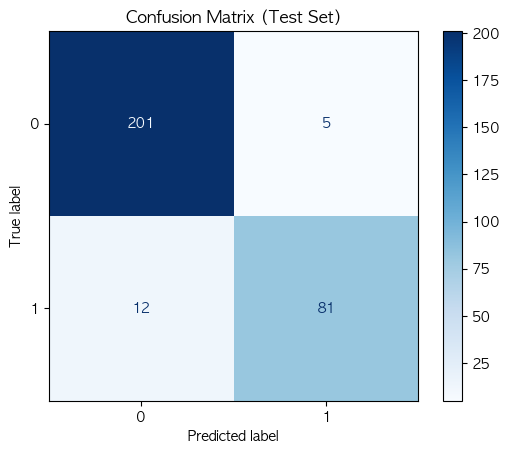

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 정밀한 파라미터 탐색 범위
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (128, 64), (64, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.005, 0.01],
    'solver': ['adam'],
    'max_iter': [300],
    'early_stopping': [True]  # 핵심 옵션
}

# 기본 모델 생성
mlp = MLPClassifier(random_state=1234)

# GridSearchCV 설정
grid = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',  # 평가 기준은 여기선 accuracy로 사용
    cv=3,
    n_jobs=-1,
    verbose=2
)

# 학습 수행
grid.fit(train_x_scaled, df_train_y)

# 최적 파라미터
print("🔥 Best Params:", grid.best_params_)

# 최적 모델 가져오기
best_model = grid.best_estimator_

# 예측
train_pred = best_model.predict(train_x_scaled)
test_pred = best_model.predict(test_x_scaled)

# 평가
print("\n✅ [Train Set]")
print("Accuracy:", accuracy_score(df_train_y, train_pred))
print("F1 Score:", f1_score(df_train_y, train_pred, average='binary'))

print("\n🧪 [Test Set]")
print("Accuracy:", accuracy_score(df_test_y, test_pred))
print("F1 Score:", f1_score(df_test_y, test_pred, average='binary'))

# 혼동 행렬 시각화
cm = confusion_matrix(df_test_y, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.show()


## 모델 재평가: StratifiedKFold

In [50]:
# 셀 내부 모든 출력결과를 보여주기(생략하지 않음)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 셀 내부 모든 출력결과를 보여주기(생략하지 않음)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# ▶️ 최적 파라미터 (GridSearch 결과 기반)
best_params = {
    'hidden_layer_sizes': (64, 64, 32),
    'activation': 'relu',
    'alpha': 0.001,
    'learning_rate_init': 0.01,
    'solver': 'adam',
    'max_iter': 300,
    'early_stopping': True
}

# ▶️ StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ▶️ 결과 저장용 리스트
acc_list = []
f1_list = []
fold = 1

# ▶️ 평가 대상 데이터 (train만 사용)
X = train_x_scaled
y = df_train_y.to_numpy()  # 혹시 Series일 경우 numpy 변환

for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Fold마다 새 모델 생성
    model = MLPClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='binary')  # 클래스가 binary라면
    acc_list.append(acc)
    f1_list.append(f1)

    print(f"\n📂 Fold {fold}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred, digits=3))
    
    fold += 1

# ▶️ 최종 평균 성능
print("\n✅ Stratified K-Fold 평균 성능")
print(f"Average Accuracy: {np.mean(acc_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")


MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32),
              learning_rate_init=0.01, max_iter=300, random_state=42)


📂 Fold 1
Accuracy: 0.9424
F1 Score: 0.9048
Confusion Matrix:
[[93  2]
 [ 6 38]]
              precision    recall  f1-score   support

           0      0.939     0.979     0.959        95
           1      0.950     0.864     0.905        44

    accuracy                          0.942       139
   macro avg      0.945     0.921     0.932       139
weighted avg      0.943     0.942     0.942       139



MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32),
              learning_rate_init=0.01, max_iter=300, random_state=42)


📂 Fold 2
Accuracy: 0.9568
F1 Score: 0.9348
Confusion Matrix:
[[90  5]
 [ 1 43]]
              precision    recall  f1-score   support

           0      0.989     0.947     0.968        95
           1      0.896     0.977     0.935        44

    accuracy                          0.957       139
   macro avg      0.942     0.962     0.951       139
weighted avg      0.960     0.957     0.957       139



MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32),
              learning_rate_init=0.01, max_iter=300, random_state=42)


📂 Fold 3
Accuracy: 0.9640
F1 Score: 0.9425
Confusion Matrix:
[[93  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0      0.979     0.969     0.974        96
           1      0.932     0.953     0.943        43

    accuracy                          0.964       139
   macro avg      0.955     0.961     0.958       139
weighted avg      0.964     0.964     0.964       139



MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32),
              learning_rate_init=0.01, max_iter=300, random_state=42)


📂 Fold 4
Accuracy: 0.9712
F1 Score: 0.9545
Confusion Matrix:
[[93  3]
 [ 1 42]]
              precision    recall  f1-score   support

           0      0.989     0.969     0.979        96
           1      0.933     0.977     0.955        43

    accuracy                          0.971       139
   macro avg      0.961     0.973     0.967       139
weighted avg      0.972     0.971     0.971       139



MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(64, 64, 32),
              learning_rate_init=0.01, max_iter=300, random_state=42)


📂 Fold 5
Accuracy: 0.9281
F1 Score: 0.8810
Confusion Matrix:
[[92  4]
 [ 6 37]]
              precision    recall  f1-score   support

           0      0.939     0.958     0.948        96
           1      0.902     0.860     0.881        43

    accuracy                          0.928       139
   macro avg      0.921     0.909     0.915       139
weighted avg      0.928     0.928     0.928       139


✅ Stratified K-Fold 평균 성능
Average Accuracy: 0.9525
Average F1 Score: 0.9235


### Hidden Layer(은닉층) 변경에 따른 모델 성능

In [52]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_hidden = [10 * hidden for hidden in range(5, 22)]  # 은닉층 노드 

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) # 은닉층 : 1D (5,), (10,)...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) # 은닉층 : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]


MLPClassifier(hidden_layer_sizes=(50, 50), random_state=1234)

MLPClassifier(hidden_layer_sizes=(60, 60), random_state=1234)

MLPClassifier(hidden_layer_sizes=(70, 70), random_state=1234)

MLPClassifier(hidden_layer_sizes=(80, 80), random_state=1234)

MLPClassifier(hidden_layer_sizes=(90, 90), random_state=1234)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1234)

MLPClassifier(hidden_layer_sizes=(110, 110), random_state=1234)

MLPClassifier(hidden_layer_sizes=(120, 120), random_state=1234)

MLPClassifier(hidden_layer_sizes=(130, 130), random_state=1234)

MLPClassifier(hidden_layer_sizes=(140, 140), random_state=1234)

MLPClassifier(hidden_layer_sizes=(150, 150), random_state=1234)

MLPClassifier(hidden_layer_sizes=(160, 160), random_state=1234)

MLPClassifier(hidden_layer_sizes=(170, 170), random_state=1234)

MLPClassifier(hidden_layer_sizes=(180, 180), random_state=1234)

MLPClassifier(hidden_layer_sizes=(190, 190), random_state=1234)

MLPClassifier(hidden_layer_sizes=(200, 200), random_state=1234)

MLPClassifier(hidden_layer_sizes=(210, 210), random_state=1234)

In [53]:
# 은닉층별 정확도
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,50,0.688,0.689
1,60,0.688,0.689
2,70,0.472,0.462
3,80,0.412,0.421
4,90,0.688,0.689
5,100,0.711,0.719
6,110,0.688,0.689
7,120,0.688,0.689
8,130,0.580,0.528
9,140,0.688,0.689


Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Hidden Layer')

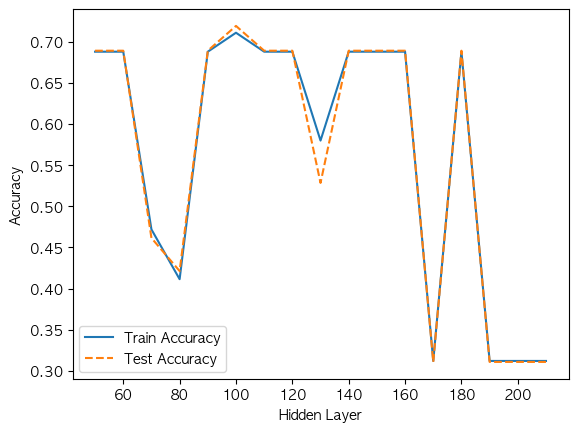

In [54]:
# 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

<!-- 은닉층 구조가 복잡할수록 train모델의 성능은 향상되나. test데이터 성능은 변동이 심함. -->

과적합 경향성과 성능차를 고려해 (100, 100)으로 선택

### Activation : 활성화 함수 변경에 따른 모델 성능

In [55]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes=(100,100), random_state = 1234)
#     nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60), random_state = 1234) # 변경 가능
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1234)

In [56]:
# Activation Function별 정확도 
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.688,0.689
1,tanh,0.799,0.746
2,relu,0.711,0.719


Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Activation Function')

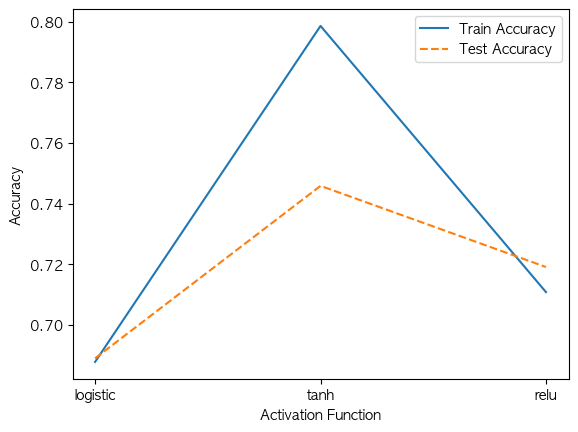

In [57]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Activation Function")
plt.legend()

### Solver : 가중치 최적화 변경에 따른 모델 성능

In [58]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="tanh", hidden_layer_sizes=(100,100), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100),
              random_state=1234, solver='lbfgs')

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100),
              random_state=1234, solver='sgd')

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100),
              random_state=1234)

In [59]:
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,0.704,0.689
1,sgd,0.688,0.689
2,adam,0.799,0.746


Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Solver')

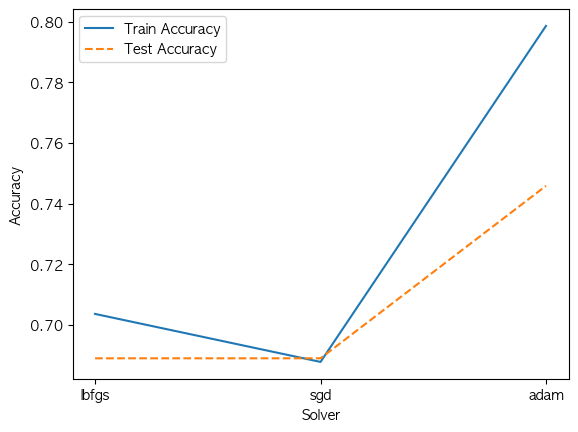

In [60]:
# 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Solver")
plt.legend()

정확도가 높은 "adam"선택: 일반적으로 가장 많이 사용하는 가중치 최적화 방법

### Mini Batch 변경에 따른 모델 성능

In [61]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경
para_batch = [30 * batch for batch in range(1, 10)] 

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "tanh", 
                       hidden_layer_sizes = (100,100), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

[30, 60, 90, 120, 150, 180, 210, 240, 270]


MLPClassifier(activation='tanh', batch_size=30, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=60, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=90, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=150, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=180, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=210, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=240, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=270, hidden_layer_sizes=(100, 100),
              random_state=1234)

In [62]:
# Mini Batch 별 정확도 
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,30,0.688,0.689
1,60,0.688,0.689
2,90,0.688,0.689
3,120,0.757,0.742
4,150,0.822,0.789
5,180,0.688,0.689
6,210,0.688,0.689
7,240,0.688,0.689
8,270,0.840,0.796


Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Mini Batch Size')

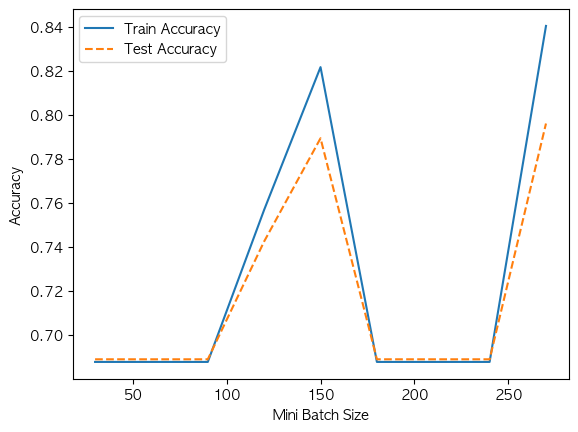

In [63]:
# 모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

###### train모델은 과적합 + 변화없음

=> 미니배치 120선택

### 학습률 변경에 따른 모델 성능

In [64]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []
# 학습률 변경
# para_lr = [0.01 * lr for lr in range(1, 10)] 
para_lr = [0.0001, 0.001, 0.005, 0.01, 0.015, 0.02] 

print(para_lr)

for v_lr in para_lr:
    nn = MLPClassifier(learning_rate_init = v_lr, solver = "adam", activation = "tanh", 
                       hidden_layer_sizes = (100,100), batch_size = 120, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))    

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["Learning Rate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

[0.0001, 0.001, 0.005, 0.01, 0.015, 0.02]


MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.0001, random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.005, random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.01, random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.015, random_state=1234)

MLPClassifier(activation='tanh', batch_size=120, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.02, random_state=1234)

In [65]:
# 학습률별 정확도 
df_accuracy_lr.round(3)

,Learning Rate,TrainAccuracy,TestAccuracy
0,0.000,0.689,0.689
1,0.001,0.757,0.742
2,0.005,0.688,0.689
3,0.010,0.688,0.689
4,0.015,0.688,0.689
5,0.020,0.688,0.689


Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Learning Rate')

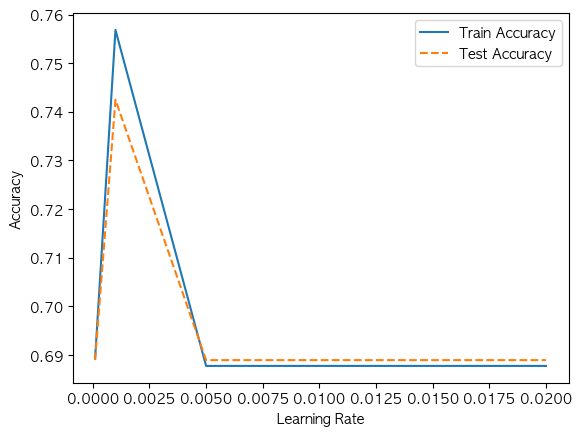

In [66]:
# 모델 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Learning Rate")
plt.legend()

#### 학습률 증가할수록 모델 정확도 낮아짐 -> 0.001로 선택  

## (3)결론 도출

In [67]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(90, 90), learning_rate_init = 0.001, activation="logistic", solver="adam", batch_size = 180, random_state = 1234)
nn_final.fit(df_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(nn_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(nn_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

MLPClassifier(activation='logistic', batch_size=180,
              hidden_layer_sizes=(90, 90), random_state=1234)

Train Accucary : 0.832
Test Accuracy : 0.806

Test Confusion Matrix: 
[[178  28]
 [ 30  63]]
              precision    recall  f1-score   support

           0      0.856     0.864     0.860       206
           1      0.692     0.677     0.685        93

    accuracy                          0.806       299
   macro avg      0.774     0.771     0.772       299
weighted avg      0.805     0.806     0.805       299



In [68]:
# Grid Search Best Model
#activation': 'relu', 'alpha': 0.001, 'early_stopping': True,
# 'hidden_layer_sizes': (64, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 300, 'solver': 'adam'
# 최종 모델
best_model = grid.best_estimator_
best_model.fit(train_x_scaled, df_train_y)

# 평가
y_pred = best_model.predict(test_x_scaled)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(best_model.score(train_x_scaled, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(best_model.score(test_x_scaled, df_test_y)))
# confusion matrix
print("Test Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))


MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=(128, 64),
              learning_rate_init=0.005, max_iter=300, random_state=1234)

Train Accucary : 0.984
Test Accuracy : 0.943

Test Confusion Matrix: 
[[201   5]
 [ 12  81]]
              precision    recall  f1-score   support

           0      0.944     0.976     0.959       206
           1      0.942     0.871     0.905        93

    accuracy                          0.943       299
   macro avg      0.943     0.923     0.932       299
weighted avg      0.943     0.943     0.943       299



In [69]:
# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
# 최종 모델
# nn_final = MLPClassifier(hidden_layer_sizes=(30, 30), activation="tanh", solver="adam", batch_size = 160, random_state = 1234)
# nn_final.fit(df_train_x, df_train_y)
# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

# 정확도
train_accuracy.append(best_model.score(train_x_scaled, df_train_y))
test_accuracy.append(best_model.score(test_x_scaled, df_test_y))

# 예측값
y_prob_1 = best_model.predict_proba(test_x_scaled)[:, 1]  # 1 발생 확률
y_pred = best_model.predict(test_x_scaled)  # 1/0 판정

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# fpr(=1-특이도) = FP/(FP+TN): 거짓 양성 비율, tpr(=민감도) = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix: 
[[201   5]
 [ 12  81]] 

              precision    recall  f1-score   support

           0      0.944     0.976     0.959       206
           1      0.942     0.871     0.905        93

    accuracy                          0.943       299
   macro avg      0.943     0.923     0.932       299
weighted avg      0.943     0.943     0.943       299



Text(0.5, 1.0, 'Neural Network')

Text(0, 0.5, '민감도,TPR')

Text(0.5, 0, '1-특이도,FPR')

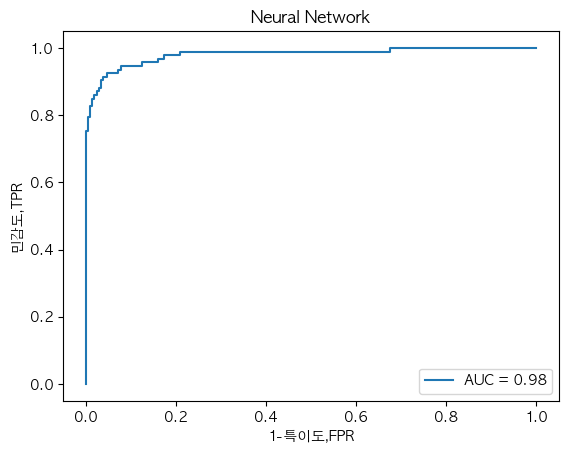

In [71]:
plt.title("Neural Network")
plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend(loc="lower right")
plt.ylabel("민감도,TPR"); plt.xlabel("1-특이도,FPR") 
plt.show()

📊 Confusion Matrix: 
 [[201   5]
 [ 12  81]] 

📄 Classification Report:
               precision    recall  f1-score   support

           0      0.944     0.976     0.959       206
           1      0.942     0.871     0.905        93

    accuracy                          0.943       299
   macro avg      0.943     0.923     0.932       299
weighted avg      0.943     0.943     0.943       299



<Figure size 700x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, '1 - 특이도 (False Positive Rate)')

Text(0, 0.5, '민감도 (True Positive Rate)')

Text(0.5, 1.0, '📈 ROC Curve - Neural Network')

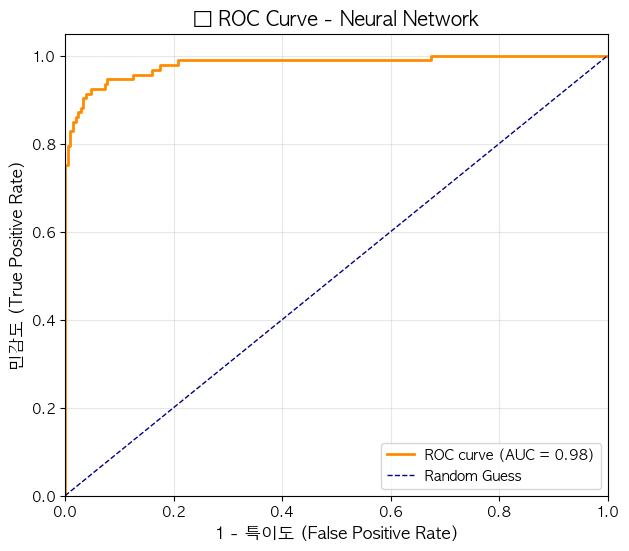

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# 예측 확률 & 결과
y_prob_1 = best_model.predict_proba(test_x_scaled)[:, 1]  # 클래스 1 확률
y_pred = best_model.predict(test_x_scaled)  # 최종 예측 결과

# 혼동 행렬 & classification report
print("📊 Confusion Matrix: \n", confusion_matrix(df_test_y, y_pred), "\n")
print("📄 Classification Report:\n", classification_report(df_test_y, y_pred, digits=3))

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(df_test_y, y_prob_1)
roc_auc = auc(fpr, tpr)
model_auc.append(roc_auc)

# ROC Curve 시각화
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - 특이도 (False Positive Rate)', fontsize=12)
plt.ylabel('민감도 (True Positive Rate)', fontsize=12)
plt.title('📈 ROC Curve - Neural Network', fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
